<a href="https://colab.research.google.com/github/aahFancyGun/dataScienceClass/blob/master/unit2/YangChauU2Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction#

The following model was designed to represent the chance that in a given year thirty percent of the the American population or more will be considered normal weight. The data was sourced from the CDC and the data points used are representations of the averages across all sexes from ages 20 and up for a given range of years. Many assumptions made during this project were informed by America's status as one of the most obese countries in the world.


In [ ]:
!pip install "preliz[full,notebook]"


In [2]:
import pandas as pd
import numpy as np
import preliz as pz
import arviz as az
import pymc as pm


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [28]:
obesity = pd.read_csv('obesityData.csv')
#reading from downloaded obesityData.csv
obesity

,INDICATOR,PANEL,PANEL_NUM,UNIT,UNIT_NUM,STUB_NAME,STUB_NAME_NUM,STUB_LABEL,STUB_LABEL_NUM,YEAR,YEAR_NUM,AGE,AGE_NUM,ESTIMATE,SE,FLAG
0,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.10,1988-1994,1,20 years and over,1.0,41.6,0.8,NaN
1,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.10,1999-2002,2,20 years and over,1.0,33.0,0.8,NaN
2,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.10,2001-2004,3,20 years and over,1.0,32.3,0.7,NaN
3,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.10,2003-2006,4,20 years and over,1.0,31.6,0.8,NaN
4,"Normal weight, overweight, and obesity among a...",Normal weight (BMI from 18.5 to 24.9),1,"Percent of population, age-adjusted",1,Total,1,20 years and over,1.10,2005-2008,5,20 years and over,1.0,30.8,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2007-2010,6,75 years and over,1.6,3.4,0.8,*
3356,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2009-2012,7,75 years and over,1.6,4.1,1.1,*
3357,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2011-2014,8,75 years and over,1.6,3.3,1.0,*
3358,"Normal weight, overweight, and obesity among a...",Grade 3 obesity (BMI greater than or equal to ...,6,"Percent of population, crude",2,Sex and age,6,Female: 75 years and over,6.26,2013-2016,9,75 years and over,1.6,3.4,0.7,NaN


#Prior#
Based off the knowledge that America is one of the most obese countries in the world I am assuming that over the years 1988 to 2014 forty percent of the time thirty percent or more of the population will be considered normal weight while sixty percent of the time less than 30 percent will be considered underweight.

<Axes: >

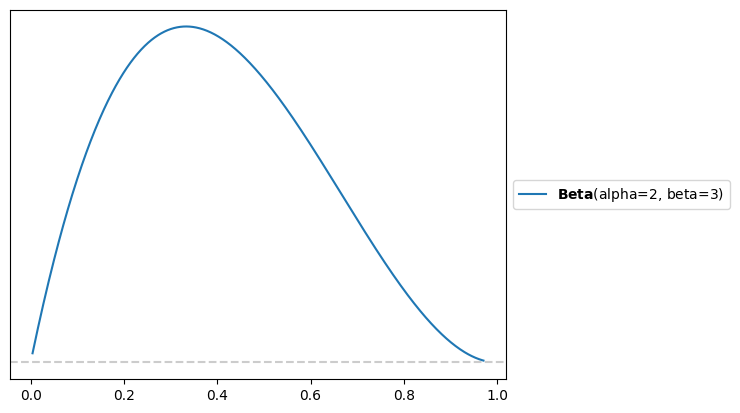

In [4]:
pz.Beta(alpha = 2, beta = 3).plot_pdf()
#graph of prior


In [5]:
normalWeightDataQuery = obesity.query('PANEL == "Normal weight (BMI from 18.5 to 24.9)" and STUB_LABEL == "20 years and over" and UNIT == "Percent of population, age-adjusted"')
#querying data
normalWeight = normalWeightDataQuery[["ESTIMATE"]]
#taking the data from the "estimate" column of queried data
normalWeight
#printing it out for debugging purposes

,ESTIMATE
0,41.6
1,33.0
2,32.3
3,31.6
4,30.8
5,29.8
6,29.6
7,28.9
8,27.7
9,26.0


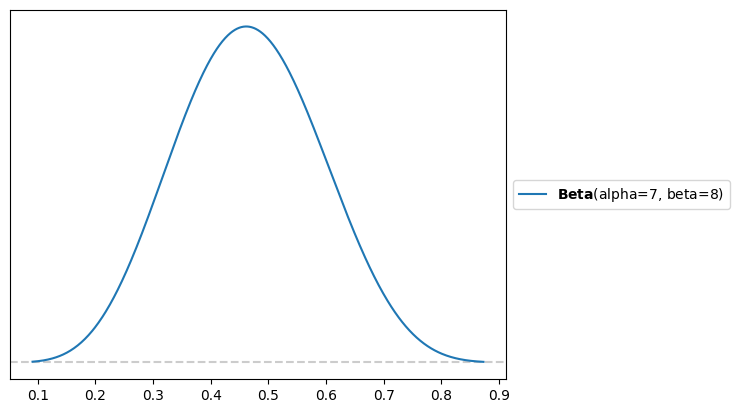

In [20]:
posterior = pz.Beta(alpha = 2 + 5, beta = 3+5).plot_pdf()
#plotting postioer


In [25]:
normWeights = np.repeat(1,5)
#how many years with 30% or more people who aren't overweight
obeseWeights = np.repeat(0,5)
#how many years with less than 30% of people who aren't overweight

weights = np.concatenate( [normWeights,obeseWeights] )

with pm.Model() as wmby_FT_model:

  θ = pm.Beta('θ' , alpha = 2. , beta = 3.)
  #defining prior
  y = pm.Bernoulli('y', p = θ, observed = weights)
  #defining likelihood in consort with prior
  idata_Obesity = pm.sample(1000)
  #generating data

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [θ]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


<Axes: title={'center': 'θ'}>

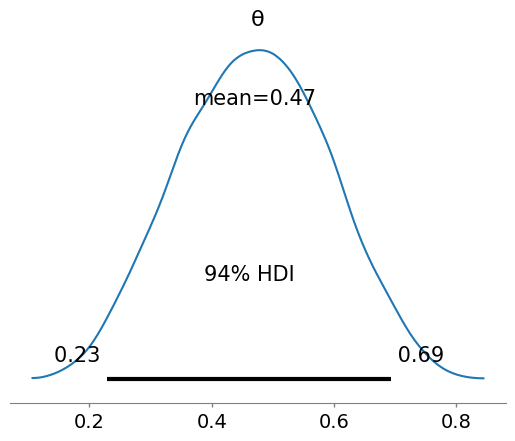

In [26]:
az.plot_posterior(idata_Obesity)
#plotting posterior

#PYMC graph analysis#

 In my prior I predicted that 40 percent of the time 30 percent or more people would be consisdered normal weight and the posterior ended up being just seven percent above that estimation, which while it isn't super substantial is definitely some good news for America. That said, I did not expect to be able to predict the results with such accurazy. Although I believed it would be quite severe with the majority of the population suffering from some form of obesity I did feel that my prior was overshooting to a degree and it appears that this feeling was correct. I don't claim to be an expert or even remotely knowledgeable in this field of study but I'd like to think that if someone like me with such limited knowledge on the subject can predict with this degree of accuracy maybe public awareness of the obesity epidemic is on the rise. That is not to say that 47% of the time only 30% or more of people will be of healthy weight is a good statistic. That would still indicate that the majority of the time, less than 30% of the people can even be considered healthy. Thus, the consumerist nature of the average American in tandem with the ease of access to unhealthy foods and lack of regulations on what can be consumed is likely to be blamed for this graph.